## Notebook 2: Análise não supervisionada | Grupo 5                                               

#### Grupo 5 | Joana Gabriel pg42870; Maria Couto pg44380 ; Sara Boaventura pg44381

Nesta etapa utilizou-se técnicas de redução de dimensionalidade e aplicou-se métodos de clustering de acordo com os dados. Assim, efetuou-se o PCA nas amostras com validação cruzada, que são os dados utilizados para o treino do modelo. O clustering foi realizado nas duas amostras, cruzadas e independentes. 

In [1]:
from propythia.linear_dim_reduction import FeatureDecomposition
import pandas as pd

**1.1 Redução de dimensionalidade das amostras com validação cruzada - PCA**

Adicionou-se a coluna 'labels' a cada dataframe para se distinguir os 'snares' de 'non_snares', sendo que aos primeiros corresponde a 'label' **1** e aos últimos a 'label' **0**.

In [2]:
non_snare_cv_feature = pd.read_csv('non_snare_cv_feature.csv', delimiter=',', encoding='latin-1',)
non_snare_cv_feature['label'] = 0
non_snare_cv_feature

,Unnamed: 0,sequence,lenght,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,...,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,label
0,0,MSDRAAAPRRGKCARLCKCESIMVAFKGVWTQPFWKAVSAEFLAML...,323.0,3.093,0.000089,1572,2477,401,443,17,...,69.231,120.000,173.077,247.692,0.787,56.693,111.024,175.591,254.331,0
1,1,MAAPILKDVVAYVEVWSSNGTENYSKTFTTQLVDMGAKVSKTFNKQ...,742.0,13.521,0.000164,3527,5626,1004,1171,38,...,77.163,139.792,195.848,256.401,0.529,80.952,177.778,294.180,391.534,0
2,2,MAAPILKDVVAYVEVWSSNGTENYSKTFTTQLVDMGAKVSKTFNKQ...,830.0,9.759,0.000106,3975,6317,1115,1294,41,...,74.462,135.385,195.077,255.385,0.446,84.821,187.946,299.107,369.643,0
3,3,MWRGRAGALLRVWGFWPTGVPRRRPLSCDAASQAGSNYPRCWNCGG...,143.0,8.891,0.000538,723,1087,213,212,8,...,57.143,117.857,196.429,255.357,2.439,63.415,156.098,246.341,346.341,0
4,4,MAAATRRVFHLQPCENSPTMSQNGYFEDSSYYKCDTDDTFEAREEI...,837.0,5.367,0.000057,4265,6654,1094,1214,38,...,71.924,142.587,192.744,264.038,0.325,76.623,145.455,212.987,269.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22216,22216,MFFFTVFDMDAYSRLALDEYERQGIAETTVIQTEYEQLDWMFHLLQ...,222.0,-4.161,-0.000158,1167,1766,312,360,8,...,80.556,188.889,238.889,308.333,1.408,61.972,126.761,228.169,308.451,0
22217,22217,MCVGPFYGADRKWLQLVEFVEHMRIFEVSMFFFTVFDMDAYSRLAL...,251.0,-5.126,-0.000172,1327,2001,351,401,11,...,81.013,191.139,251.899,317.722,1.176,44.706,117.647,205.882,291.765,0
22218,22218,MPSIQEFVKQLPTEDYYSTKLKACLEAQKQGKGQCVNTKACKLPNN...,85.0,3.955,0.000402,434,657,111,134,6,...,55.882,155.882,194.118,247.059,4.545,50.000,186.364,286.364,377.273,0
22219,22219,MARKAYEKLQELGISRHVTPLFAENVTVPIPGVVFLDCVVNDMTLI...,273.0,12.100,0.000410,1313,2127,365,381,9,...,68.224,133.645,179.439,252.336,1.190,58.333,132.143,213.095,325.000,0


In [3]:
snare_cv_feature=pd.read_csv('snare_cv_feature.csv', delimiter=',', encoding='latin-1',)
snare_cv_feature['label'] = 1
snare_cv_feature

,Unnamed: 0,sequence,lenght,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,...,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,label
0,0,MDRAKKRLASALDGFRNQHKSEMELEEKITAEDVCLTGIVRHGFPD...,1113.0,-6.023,-0.000049,5392,8468,1466,1690,54,...,70.909,131.818,190.682,252.500,0.279,69.832,144.972,229.330,310.894,1
1,1,MKKFTIKGVLDGFRSSVPQPVKPDQEIVENLRTEHFQVKKTFRHGF...,1104.0,-6.978,-0.000057,5376,8379,1437,1703,43,...,64.679,125.459,183.257,252.752,0.296,75.148,155.621,249.704,326.627,1
2,2,MKKFTIKGVLDGFRSSVPQPVKPDQEIVENLRTEHFQVKKTFRHGF...,1363.0,-8.049,-0.000053,6521,10228,1780,2147,54,...,62.956,123.905,182.664,248.358,0.260,81.818,161.558,271.948,354.026,1
3,3,MKKFNFRKVLDGLTASSPGSGSSSGSNSGGGAGSGSIHPGGGTAGV...,1187.0,-8.343,-0.000063,5802,9013,1525,1817,61,...,57.620,122.756,182.255,247.390,0.270,84.097,155.795,240.701,319.946,1
4,4,MKKFNIRKVLDGLTASSSSASAQPGALRENDAVQETLQSEHFQLCK...,1091.0,-11.440,-0.000095,5247,8175,1395,1674,53,...,63.778,126.444,181.556,242.000,0.308,73.538,155.692,244.923,335.692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21942,21942,MFGEVSEDGSRIYVPPAVEVEGQSDDPDATDLLVPRDVDTGHTVLP...,923.0,-18.406,-0.000179,4593,7083,1217,1368,30,...,58.602,113.710,173.387,245.968,0.334,76.254,144.147,211.706,308.696,1
21943,21943,MVSTVSALQARLKELSTSVAQIHPLVSRLHNFTTAVGQGDDARLEL...,754.0,-6.273,-0.000075,3629,5839,1007,1179,18,...,72.527,139.560,198.901,276.190,0.457,100.913,182.192,268.950,342.922,1
21944,21944,MKRFGLKKSSDAGDDDSSNRRALFGSRSKNKSPPAEANPYAKPIPA...,429.0,-1.168,-0.000025,1955,3071,605,689,9,...,43.814,82.474,134.536,218.041,1.587,309.524,423.810,584.127,679.365,1
21945,21945,MHQGAPHQRPATTKIHKMDISIPTYTVSSPTSFTVQVDLEGGGDVR...,345.0,7.557,0.000197,1631,2627,473,558,6,...,48.800,123.200,191.200,276.000,1.124,97.753,167.416,275.281,386.517,1


Para realizar o **PCA** juntou-se as amostras com validação cruzada ('snare_cv_feature' vs 'non_snare_cv_feature') no mesmo dataframe: **dataset_1** .

In [4]:
dataset_1 = pd.concat([snare_cv_feature, non_snare_cv_feature])
dataset_1

,Unnamed: 0,sequence,lenght,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,...,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,label
0,0,MDRAKKRLASALDGFRNQHKSEMELEEKITAEDVCLTGIVRHGFPD...,1113.0,-6.023,-0.000049,5392,8468,1466,1690,54,...,70.909,131.818,190.682,252.500,0.279,69.832,144.972,229.330,310.894,1
1,1,MKKFTIKGVLDGFRSSVPQPVKPDQEIVENLRTEHFQVKKTFRHGF...,1104.0,-6.978,-0.000057,5376,8379,1437,1703,43,...,64.679,125.459,183.257,252.752,0.296,75.148,155.621,249.704,326.627,1
2,2,MKKFTIKGVLDGFRSSVPQPVKPDQEIVENLRTEHFQVKKTFRHGF...,1363.0,-8.049,-0.000053,6521,10228,1780,2147,54,...,62.956,123.905,182.664,248.358,0.260,81.818,161.558,271.948,354.026,1
3,3,MKKFNFRKVLDGLTASSPGSGSSSGSNSGGGAGSGSIHPGGGTAGV...,1187.0,-8.343,-0.000063,5802,9013,1525,1817,61,...,57.620,122.756,182.255,247.390,0.270,84.097,155.795,240.701,319.946,1
4,4,MKKFNIRKVLDGLTASSSSASAQPGALRENDAVQETLQSEHFQLCK...,1091.0,-11.440,-0.000095,5247,8175,1395,1674,53,...,63.778,126.444,181.556,242.000,0.308,73.538,155.692,244.923,335.692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22216,22216,MFFFTVFDMDAYSRLALDEYERQGIAETTVIQTEYEQLDWMFHLLQ...,222.0,-4.161,-0.000158,1167,1766,312,360,8,...,80.556,188.889,238.889,308.333,1.408,61.972,126.761,228.169,308.451,0
22217,22217,MCVGPFYGADRKWLQLVEFVEHMRIFEVSMFFFTVFDMDAYSRLAL...,251.0,-5.126,-0.000172,1327,2001,351,401,11,...,81.013,191.139,251.899,317.722,1.176,44.706,117.647,205.882,291.765,0
22218,22218,MPSIQEFVKQLPTEDYYSTKLKACLEAQKQGKGQCVNTKACKLPNN...,85.0,3.955,0.000402,434,657,111,134,6,...,55.882,155.882,194.118,247.059,4.545,50.000,186.364,286.364,377.273,0
22219,22219,MARKAYEKLQELGISRHVTPLFAENVTVPIPGVVFLDCVVNDMTLI...,273.0,12.100,0.000410,1313,2127,365,381,9,...,68.224,133.645,179.439,252.336,1.190,58.333,132.143,213.095,325.000,0


In [5]:
# Remoção da coluna sequence 
df_1 = dataset_1.loc[:,dataset_1.columns[2:]]     
df_1

,lenght,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,hydrogen,...,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,label
0,1113.0,-6.023,-0.000049,5392,8468,1466,1690,54,19969,10957,...,70.909,131.818,190.682,252.500,0.279,69.832,144.972,229.330,310.894,1
1,1104.0,-6.978,-0.000057,5376,8379,1437,1703,43,19782,10834,...,64.679,125.459,183.257,252.752,0.296,75.148,155.621,249.704,326.627,1
2,1363.0,-8.049,-0.000053,6521,10228,1780,2147,54,24266,13288,...,62.956,123.905,182.664,248.358,0.260,81.818,161.558,271.948,354.026,1
3,1187.0,-8.343,-0.000063,5802,9013,1525,1817,61,21369,11684,...,57.620,122.756,182.255,247.390,0.270,84.097,155.795,240.701,319.946,1
4,1091.0,-11.440,-0.000095,5247,8175,1395,1674,53,19477,10663,...,63.778,126.444,181.556,242.000,0.308,73.538,155.692,244.923,335.692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22216,222.0,-4.161,-0.000158,1167,1766,312,360,8,4167,2255,...,80.556,188.889,238.889,308.333,1.408,61.972,126.761,228.169,308.451,0
22217,251.0,-5.126,-0.000172,1327,2001,351,401,11,4727,2556,...,81.013,191.139,251.899,317.722,1.176,44.706,117.647,205.882,291.765,0
22218,85.0,3.955,0.000402,434,657,111,134,6,1608,865,...,55.882,155.882,194.118,247.059,4.545,50.000,186.364,286.364,377.273,0
22219,273.0,12.100,0.000410,1313,2127,365,381,9,4897,2731,...,68.224,133.645,179.439,252.336,1.190,58.333,132.143,213.095,325.000,0


In [6]:
# dataset_1 sem a coluna label para realizar PCA e o clustering
labels_1 = df_1['label']
dataset_1 = df_1.loc[:, df_1.columns != 'label']
dataset_1

,lenght,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,hydrogen,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,1113.0,-6.023,-0.000049,5392,8468,1466,1690,54,19969,10957,...,0.909,70.909,131.818,190.682,252.500,0.279,69.832,144.972,229.330,310.894
1,1104.0,-6.978,-0.000057,5376,8379,1437,1703,43,19782,10834,...,1.147,64.679,125.459,183.257,252.752,0.296,75.148,155.621,249.704,326.627
2,1363.0,-8.049,-0.000053,6521,10228,1780,2147,54,24266,13288,...,0.912,62.956,123.905,182.664,248.358,0.260,81.818,161.558,271.948,354.026
3,1187.0,-8.343,-0.000063,5802,9013,1525,1817,61,21369,11684,...,2.505,57.620,122.756,182.255,247.390,0.270,84.097,155.795,240.701,319.946
4,1091.0,-11.440,-0.000095,5247,8175,1395,1674,53,19477,10663,...,2.667,63.778,126.444,181.556,242.000,0.308,73.538,155.692,244.923,335.692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22216,222.0,-4.161,-0.000158,1167,1766,312,360,8,4167,2255,...,6.944,80.556,188.889,238.889,308.333,1.408,61.972,126.761,228.169,308.451
22217,251.0,-5.126,-0.000172,1327,2001,351,401,11,4727,2556,...,5.063,81.013,191.139,251.899,317.722,1.176,44.706,117.647,205.882,291.765
22218,85.0,3.955,0.000402,434,657,111,134,6,1608,865,...,5.882,55.882,155.882,194.118,247.059,4.545,50.000,186.364,286.364,377.273
22219,273.0,12.100,0.000410,1313,2127,365,381,9,4897,2731,...,1.869,68.224,133.645,179.439,252.336,1.190,58.333,132.143,213.095,325.000


In [7]:
# Criação do objeto
fd_1=FeatureDecomposition(fps_x=df_1, report_name=None, classes= labels_1)

In [8]:
# Performance do PCA
pca,x_pca=fd_1.run_pca(n_components=30)

Original shape: (44168, 641)
Reduced shape: (44168, 30)
Variance explained by the PC: 0.9999971014195133
Number of components: 30
Finished 'run_pca' in 9.0992 secs


In [9]:
# Verificar o rácio da variância dos componentes
ex_variance_ratio = fd_1.variance_ratio_components()
print(ex_variance_ratio)

[9.31576618e-01 6.80853509e-02 1.92779628e-04 5.03924012e-05
 2.01316564e-05 1.81090309e-05 9.32830647e-06 7.79829158e-06
 6.32792809e-06 5.45647324e-06 4.17309491e-06 4.06098649e-06
 3.20266784e-06 2.06776011e-06 2.01622471e-06 1.63341560e-06
 1.54915170e-06 1.36546874e-06 1.23651801e-06 1.02384448e-06
 9.86272129e-07 8.61132826e-07 6.14037109e-07 5.87591475e-07
 4.95702317e-07 4.71809864e-07 4.05945885e-07 3.53266915e-07
 3.28561131e-07 2.73984256e-07]


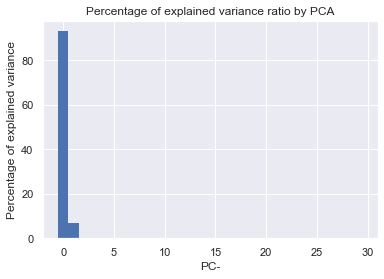

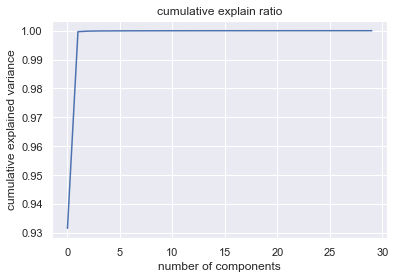

<Figure size 432x288 with 0 Axes>

In [10]:
# Gráficos
# Barplot com a contribuição de cada pca
fd_1.pca_bar_plot(show=True, path_save=None,
                title='Percentage of explained variance ratio by PCA',
                width=1, data=None, color='b', edgecolor='k', linewidth=0,
                tick_label=None)

fd_1.pca_cumulative_explain_ratio(show=True, path_save=None)

Observando o gráfico anterior, conclui-se que mais de 80% da variância dos dados pode ser explicada pelo primeiro componente principal (PC1).

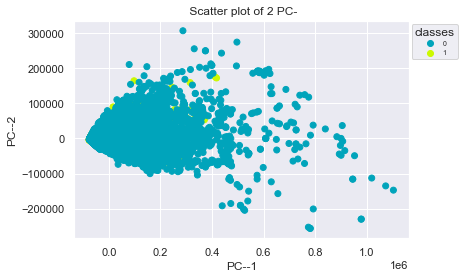

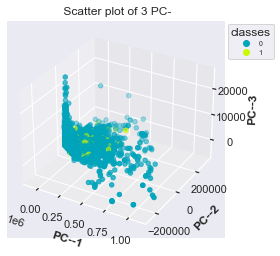

Original shape: (44168, 641)
Reduced shape: (44168, 30)
Variance explained by PC: 0.9999971014195133
Number of components 30


<Figure size 432x288 with 0 Axes>

In [11]:
# Scatter plot dos dois principais componentes em relação a labels
fd_1.pca_scatter_plot(target=labels_1, pca1=0, pca2=1, title=None, show=True, path_save='pca_scatter_plot.png')

# Scatter plot dos três principais componentes em relação a labels
fd_1.pca_scatter_plot3d(target=labels_1, pca1=0, pca2=1, pca3=2, title=None, show=True,
                path_save='pca_scatter_plot.png')

print("Original shape: {}".format(str(df_1.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))
print('Variance explained by PC:', sum(pca.explained_variance_ratio_))
print("Number of components {}".format(pca.n_components_))

Por observação dos *scatter plots* pode-se concluir que pelo atributo *features* não é possível distinguir as amostras com validação cruzada: 'snares' e 'non_snares'.

**2. Clustering**

In [12]:
import pandas as pd
import numpy as np
from propythia.clustering import Cluster
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

**Amostras com validação cruzada**:

In [13]:
x_original=df_1.loc[:, df_1.columns != 'label'] # sem a coluna label
labels_1=df_1.loc[:,'label'] # label

# Standardização dos dados
scaler_1 = StandardScaler()
fps_x_1 = scaler_1.fit_transform(x_original)

In [14]:
# Criação do objeto 
cl_1=Cluster(fps_x_1, target=labels_1, report_name=None)

accuracy 0.5874388697699692
label         0      1
clusters              
0          4044     45
1         18177  21902


<Figure size 432x288 with 0 Axes>

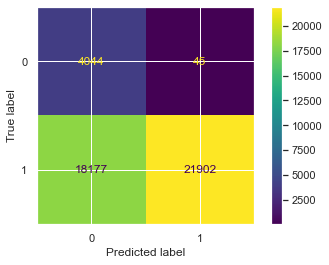

Finished 'run_kmeans' in 20.8105 secs


<Figure size 432x288 with 0 Axes>

In [15]:
# Performance do K-means
clf_1, y_labels_1, centroids_1 = cl_1.run_kmeans(max_iter=5000, n_clusters=None, init='k-means++', random_state=42)

De acordo com a observação do gráfico acima, é possível concluir que foram previstas corretamente pelo modelo um total de 25946 amostras, em que 4044 são 'non_snares' e 21902 são 'snares'. Deste modo, foram previstas incorretamente pelo modelo cerca de 18222 amostras, das quais 18177 foram previstas erradamente como 'non_snares' e 45 'non_snares' foram previstas como 'snares'.

accuracy 0.41206303205940953
label         0      1
clusters              
0         18151  21898
1          4070     49


<Figure size 432x288 with 0 Axes>

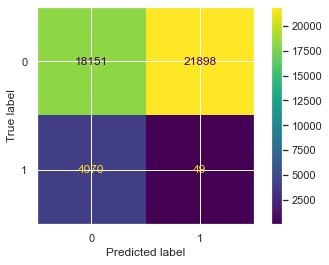

Finished 'run_minibatch_kmeans' in 2.7124 secs


<Figure size 432x288 with 0 Axes>

In [16]:
# Minibatch
clf_1, y_labels_1, centroids_1 = cl_1.run_minibatch_kmeans(max_iter=300, batch_size=100,
                                                       n_clusters=2, init='k-means++', random_state=42)

cl_1=Cluster(fps_x_1, target=labels_1, report_name=None)

De acordo com a observação do gráfico acima, é possível concluir que foram previstas corretamente pelo modelo um total de 18200 amostras, em que 18151 são 'non_snares' e 49 são 'snares'. Deste modo, foram previstas incorretamente pelo modelo cerca de 15968 amostras, das quais 4070 foram previstas erradamente como 'non_snares' e 21898 'non_snares' foram previstas como 'snares'.

Comparando os dois gráficos, conclui-se que o primeiro tem uma 'accuracy' de aproximadamente 59%, sendo mais elevada que o segundo que tem apenas 41%.

**Amostras independentes**:

Adicionou-se a coluna 'labels' a cada dataframe para se distinguir os 'snares' de 'non_snares', sendo que aos primeiros corresponde a 'label' 1 e aos últimos a 'label' 0.

In [17]:
non_snare_ind_feature = pd.read_csv('non_snare_ind_feature.csv', delimiter=',', encoding='latin-1',)
non_snare_ind_feature['label'] = 0
non_snare_ind_feature

,sequence,lenght,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,...,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,label
0,MIFNKILPNIWLGSCPRQVEHVTIKLKHELGITAVMNFQTEWDIVQ...,177.0,2.095,0.000103,902,1393,235,258,15,3299,...,90.000,143.333,203.333,293.333,1.493,52.239,134.328,194.030,264.179,0
1,MKHTTDFYFNIAGHQAMHYSRILPNIWLGSCPRQVEHVTIKLKHEL...,193.0,2.391,0.000108,985,1504,260,283,16,3586,...,54.930,126.761,190.141,270.423,1.449,69.565,150.725,207.246,279.710,0
2,MRFRFGVVVPPAVAGARPELLVVGSRPELGRWEPRGAVRLRPAGTA...,267.0,-9.560,-0.000320,1326,2014,360,396,15,4815,...,53.211,117.431,177.982,244.954,1.205,73.494,174.699,239.759,320.482,0
3,MSSKQATSPFACAADGEDAMTQDLTSREKEEGSDQHVASHLPLHPI...,828.0,2.476,0.000027,3882,6131,1091,1354,38,14649,...,77.059,125.882,182.353,243.235,0.541,105.405,203.784,328.108,445.946,0
4,MSSKQATSPFACAADGEDAMTQDLTSREKEEGSDQHVASHLPLHPI...,801.0,-0.918,-0.000010,3758,5936,1044,1318,38,14184,...,70.122,122.866,184.451,243.902,0.559,106.704,207.821,334.078,445.810,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,MWSEGRYEYERIPRERAPPRSHPSDESGYRWTRDDHSASRQPEYRD...,409.0,3.101,0.000066,1991,3113,587,683,10,7395,...,52.601,103.468,170.520,234.104,1.316,203.947,321.053,443.421,530.263,0
4399,MWSEGRYEYERIPRERAPPRSHPSDESGYRWTRDDHSASRQPEYRD...,232.0,3.719,0.000139,1137,1762,346,392,2,4174,...,54.128,98.165,149.541,205.505,3.030,224.242,433.333,572.727,703.030,0
4400,MAPAEILNGKEISAQIRARLKNQVTQLKEQVPGFTPRLAILQVGNR...,964.0,1.742,0.000017,4641,7463,1251,1409,30,17130,...,70.300,129.155,196.185,262.398,0.322,75.884,158.842,234.727,309.968,0
4401,MEPSALGPWSLFPDLAPRDQEGQVLAPRRCFRRECGQNEKGDGSWK...,284.0,-1.581,-0.000049,1412,2186,390,440,10,5135,...,66.000,148.000,218.000,284.000,1.205,93.976,163.855,250.602,340.964,0


In [18]:
snare_ind_feature=pd.read_csv('snare_ind_feature.csv', delimiter=',', encoding='latin-1',)
snare_ind_feature['label'] = 1
snare_ind_feature

,sequence,lenght,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,...,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,label
0,MSAWAQKALKGRSQLLRENILALIILNEVRITLNVEKSNLYLFRII...,2594.0,-12.299,-0.000043,12449,19566,3410,4034,130,46685,...,62.162,131.809,204.470,269.439,0.130,75.033,157.607,256.177,336.931,1
1,MCECNLLGTQPGVCDFLGRCLCRSGVTGVQCDSCQPGHHSFPACQE...,2846.0,-26.832,-0.000086,13525,21095,3723,4397,167,51054,...,58.280,120.403,194.602,260.201,0.119,77.712,160.310,258.284,338.856,1
2,MEEEESSAGDQRLHFLQERVLKTLRLKPDRWQKCLAVEEQKQVIQD...,4466.0,-97.693,-0.000191,22715,35340,5924,6946,201,82450,...,83.310,165.692,242.867,318.188,0.067,73.635,146.205,219.041,297.337,1
3,MKKTDTKDLLLKDKLLKGVKNILIVTVVALFVTAGIALQISYDTAI...,579.0,-21.749,-0.000343,2752,4410,728,933,16,10174,...,72.596,134.135,202.885,278.365,0.592,75.740,166.272,259.172,342.012,1
4,MSFFKRNKGPMIPPVGSEPDDMYASRGGPANGAGGDPYANRGGNMA...,369.0,-5.655,-0.000140,1693,2683,535,594,9,6354,...,41.892,87.838,178.378,249.324,1.667,233.333,371.667,513.333,613.333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,MKKFNIRKVLDGLAASSFSSASPQPGTSQNDVIQETLQSEHFQLCK...,1111.0,-10.176,-0.000083,5378,8372,1414,1707,51,19890,...,61.978,125.275,182.198,243.736,0.299,74.251,154.192,246.108,332.635,1
4382,MKKFNIRKVLDGLAASSFSSASPQPGTSQNDVIQETLQSEHFQLCK...,1132.0,-11.074,-0.000089,5475,8523,1443,1747,51,20259,...,61.987,124.190,182.289,244.060,0.297,74.184,153.116,249.852,335.905,1
4383,MKKFNIRKVLDGLAASSFSSASPQPGTSQNDVIQETLQSEHFQLCK...,1148.0,-7.074,-0.000056,5557,8657,1469,1770,51,20558,...,63.248,124.145,183.120,244.872,0.293,75.367,153.372,250.440,336.657,1
4384,MKKFNIRKVLDGLAASSFSSASPQPGTSQNDVIQETLQSEHFQLCK...,1151.0,0.689,0.000005,5588,8724,1482,1765,53,20702,...,62.232,124.464,184.549,246.567,0.291,75.581,152.616,249.128,334.593,1


Para realizar o clustering juntou-se as amostras independentes ('snare_cv_feature' vs 'non_snare_cv_feature') no mesmo dataframe: dataset_2 .

In [19]:
dataset_2 = pd.concat([snare_ind_feature, non_snare_ind_feature])
dataset_2

,sequence,lenght,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,...,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,label
0,MSAWAQKALKGRSQLLRENILALIILNEVRITLNVEKSNLYLFRII...,2594.0,-12.299,-0.000043,12449,19566,3410,4034,130,46685,...,62.162,131.809,204.470,269.439,0.130,75.033,157.607,256.177,336.931,1
1,MCECNLLGTQPGVCDFLGRCLCRSGVTGVQCDSCQPGHHSFPACQE...,2846.0,-26.832,-0.000086,13525,21095,3723,4397,167,51054,...,58.280,120.403,194.602,260.201,0.119,77.712,160.310,258.284,338.856,1
2,MEEEESSAGDQRLHFLQERVLKTLRLKPDRWQKCLAVEEQKQVIQD...,4466.0,-97.693,-0.000191,22715,35340,5924,6946,201,82450,...,83.310,165.692,242.867,318.188,0.067,73.635,146.205,219.041,297.337,1
3,MKKTDTKDLLLKDKLLKGVKNILIVTVVALFVTAGIALQISYDTAI...,579.0,-21.749,-0.000343,2752,4410,728,933,16,10174,...,72.596,134.135,202.885,278.365,0.592,75.740,166.272,259.172,342.012,1
4,MSFFKRNKGPMIPPVGSEPDDMYASRGGPANGAGGDPYANRGGNMA...,369.0,-5.655,-0.000140,1693,2683,535,594,9,6354,...,41.892,87.838,178.378,249.324,1.667,233.333,371.667,513.333,613.333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,MWSEGRYEYERIPRERAPPRSHPSDESGYRWTRDDHSASRQPEYRD...,409.0,3.101,0.000066,1991,3113,587,683,10,7395,...,52.601,103.468,170.520,234.104,1.316,203.947,321.053,443.421,530.263,0
4399,MWSEGRYEYERIPRERAPPRSHPSDESGYRWTRDDHSASRQPEYRD...,232.0,3.719,0.000139,1137,1762,346,392,2,4174,...,54.128,98.165,149.541,205.505,3.030,224.242,433.333,572.727,703.030,0
4400,MAPAEILNGKEISAQIRARLKNQVTQLKEQVPGFTPRLAILQVGNR...,964.0,1.742,0.000017,4641,7463,1251,1409,30,17130,...,70.300,129.155,196.185,262.398,0.322,75.884,158.842,234.727,309.968,0
4401,MEPSALGPWSLFPDLAPRDQEGQVLAPRRCFRRECGQNEKGDGSWK...,284.0,-1.581,-0.000049,1412,2186,390,440,10,5135,...,66.000,148.000,218.000,284.000,1.205,93.976,163.855,250.602,340.964,0


In [20]:
df_2 = dataset_2.loc[:,dataset_2.columns[1:]]    # remoção da coluna sequence para a relização do clustering 
df_2

,lenght,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,hydrogen,...,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,label
0,2594.0,-12.299,-0.000043,12449,19566,3410,4034,130,46685,25549,...,62.162,131.809,204.470,269.439,0.130,75.033,157.607,256.177,336.931,1
1,2846.0,-26.832,-0.000086,13525,21095,3723,4397,167,51054,27801,...,58.280,120.403,194.602,260.201,0.119,77.712,160.310,258.284,338.856,1
2,4466.0,-97.693,-0.000191,22715,35340,5924,6946,201,82450,45209,...,83.310,165.692,242.867,318.188,0.067,73.635,146.205,219.041,297.337,1
3,579.0,-21.749,-0.000343,2752,4410,728,933,16,10174,5653,...,72.596,134.135,202.885,278.365,0.592,75.740,166.272,259.172,342.012,1
4,369.0,-5.655,-0.000140,1693,2683,535,594,9,6354,3467,...,41.892,87.838,178.378,249.324,1.667,233.333,371.667,513.333,613.333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,409.0,3.101,0.000066,1991,3113,587,683,10,7395,4011,...,52.601,103.468,170.520,234.104,1.316,203.947,321.053,443.421,530.263,0
4399,232.0,3.719,0.000139,1137,1762,346,392,2,4174,2245,...,54.128,98.165,149.541,205.505,3.030,224.242,433.333,572.727,703.030,0
4400,964.0,1.742,0.000017,4641,7463,1251,1409,30,17130,9545,...,70.300,129.155,196.185,262.398,0.322,75.884,158.842,234.727,309.968,0
4401,284.0,-1.581,-0.000049,1412,2186,390,440,10,5135,2803,...,66.000,148.000,218.000,284.000,1.205,93.976,163.855,250.602,340.964,0


In [21]:
x_original=df_2.loc[:, df_2.columns != 'label']   # sem a coluna label
labels_2=df_2.loc[:,'label'] # label

# Standardização dos dados
scaler_2 = StandardScaler()
fps_x_2 = scaler_2.fit_transform(x_original)


In [22]:
# Criação do objeto 
cl_2=Cluster(fps_x_2, target=labels_2, report_name=None)


accuracy 0.4234839003299579
label        0     1
clusters            
0         1377  2041
1         3026  2345


<Figure size 432x288 with 0 Axes>

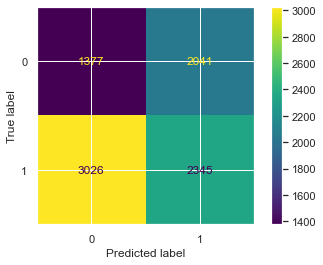

Finished 'run_kmeans' in 3.7397 secs


<Figure size 432x288 with 0 Axes>

In [23]:
# Performance do K-means
clf_2, y_labels, centroids = cl_2.run_kmeans(max_iter=5000, n_clusters=None, init='k-means++', random_state=42)

De acordo com a observação do gráfico acima, é possível concluir que foram previstas corretamente pelo modelo um total de **3722** amostras, em que 1377 são **'non_snares'** e 2345 são **'snares'**. Deste modo, foram previstas incorretamente pelo modelo cerca de 5067 **amostras**, das quais 3026 foram previstas erradamente como 'non_snares' e 2041 'non_snares' foram previstas como 'snares'.

accuracy 0.41347138468540223
label        0     1
clusters            
0          729  1481
1         3674  2905


<Figure size 432x288 with 0 Axes>

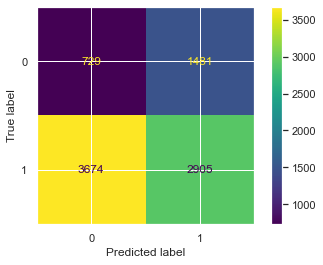

Finished 'run_minibatch_kmeans' in 0.9819 secs


<Figure size 432x288 with 0 Axes>

In [24]:
 # Minibatch
clf_2, y_labels, centroids = cl_2.run_minibatch_kmeans(max_iter=300, batch_size=100,
                                                       n_clusters=2, init='k-means++', random_state=42)

cl_2=Cluster(fps_x_2, target=labels_2, report_name=None)

De acordo com a observação do gráfico acima, é possível concluir que foram previstas corretamente pelo modelo um total de **3625** amostras, em que 720 são **'non_snares'** e 2905 são **'snares'**. Deste modo, foram previstas incorretamente pelo modelo cerca de  **5105** amostras, das quais 3674 foram previstas erradamente como 'non_snares' e 1431 'non_snares' foram previstas como 'snares'.

Comparando os dois gráficos, conclui-se que o primeiro tem uma 'accuracy' de **aproximadamente 42%**, sendo mais elevada que o segundo.